In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [19]:
data = pd.read_csv('./train.csv')
data.head()

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4781 non-null   int64  
 1   Rooms          4781 non-null   int64  
 2   Type           4781 non-null   int64  
 3   Price          4781 non-null   int64  
 4   Method         4781 non-null   int64  
 5   SellerG        4781 non-null   int64  
 6   Distance       4781 non-null   float64
 7   Postcode       4781 non-null   int64  
 8   Bathroom       4781 non-null   int64  
 9   Car            4781 non-null   int64  
 10  Landsize       4781 non-null   int64  
 11  BuildingArea   4781 non-null   float64
 12  YearBuilt      4781 non-null   int64  
 13  CouncilArea    4781 non-null   int64  
 14  Longtitude     4781 non-null   float64
 15  Regionname     4781 non-null   int64  
 16  Propertycount  4781 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 635.1 KB


## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `r2_score` for this prediction.
- Try improving upon the `r2_score` using different regularization techniques.

In [29]:
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_val.shape)

(3824, 16) (957, 16)


In [30]:
pipeline = Pipeline([
    ('scaling', 'passthrough'),
    ('model', 'passthrough')
])

param_grid = {
    'scaling': [StandardScaler(), MinMaxScaler()],
    'model': [LinearRegression(), Ridge(), Lasso(), ElasticNet(), XGBRegressor(), RandomForestRegressor()]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', 'passthrough'),
                                       ('model', 'passthrough')]),
             n_jobs=-1,
             param_grid={'model': [LinearRegression(), Ridge(), Lasso(),
                                   ElasticNet(),
                                   XGBRegressor(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                gamma=None, gpu_id=None,
                                                importance_type='gain',
                                                interaction_constrai...
                                                max_depth=None,
                                                min_child_weight=None,
                                                missing=

In [32]:
grid.best_estimator_

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=4, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [33]:
y_pred = grid.best_estimator_.predict(X_val)

# Evaluate the R2 Score
print('Training R2 score: ', r2_score(y_train, grid.best_estimator_.predict(X_train)))
print('Validation R2 score: ', r2_score(y_val, y_pred))

Training R2 score:  0.9888581620665506
Validation R2 score:  0.7234073892093575


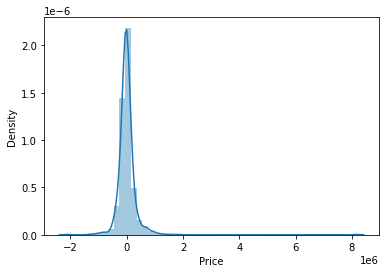

In [34]:
sns.distplot(y_val-y_pred)
plt.show()

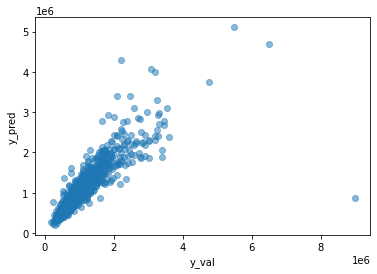

In [35]:
plt.scatter(y_val, y_pred, alpha = 0.5)
plt.xlabel("y_val")
plt.ylabel("y_pred")
plt.show()

In [36]:
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_val)

# Evaluate the R2 Score
print('Training R2 score: ', r2_score(y_train, grid.best_estimator_.predict(X_train)))
print('Validation R2 score: ', r2_score(y_val, y_pred))

Training R2 score:  0.9888581620665506
Validation R2 score:  0.7265855687478722


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [37]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,Id,Rooms,Type,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,5067,4,0,1,32,27.0,3196,2,2,536,202.0,1985,12,145.13286,4,2076
1,3722,4,0,1,28,12.4,3060,2,2,567,116.0,1950,23,144.97030,2,5070
2,6820,5,0,1,16,12.4,3107,3,2,717,310.0,1963,-1,145.11320,0,5420
3,3103,2,2,1,196,3.3,3141,1,1,0,61.0,1965,26,144.98860,5,14887
4,2820,3,0,1,16,11.2,3073,2,1,618,149.0,1965,6,145.02120,2,21650


In [38]:
#y_pred = grid.best_estimator_.predict(df_test)
#y_pred = rfr.predict(df_test)
y_pred = rfr.predict(df_test)

# Prepare dataframe with ID and target column
sumbission_df = pd.DataFrame()
sumbission_df['Id'] = df_test['Id']
sumbission_df['Price'] = y_pred
sumbission_df.head()

,Id,Price
0,5067,9.527490e+05
1,3722,7.704872e+05
2,6820,1.703854e+06
3,3103,5.348590e+05
4,2820,7.732657e+05


In [39]:
# Write Final predictions
sumbission_df.to_csv("./submission.csv", index=False)